In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
import torch
import sklearn.datasets
import sklearn.decomposition
import sklearn.manifold
from matplotlib import pyplot as plt

import paradime.dr
import paradime.relations
import paradime.transforms
import paradime.loss

In [3]:
diabetes = sklearn.datasets.load_diabetes()
data = diabetes['data']

In [4]:
pca = sklearn.decomposition.PCA()
pca.fit(data)

PCA()

In [5]:
pd_pca = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    verbose=True,
)
pd_pca.register_dataset({
    'data': data,
    'pca': pca.transform(data),
})
pd_pca.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_pca.train()

2022-08-26 22:47:22,095: Registering dataset.
2022-08-26 22:47:22,096: Beginning training phase 'None'.
2022-08-26 22:47:22,105: Loss after epoch 0: 0.026086523896083236
2022-08-26 22:47:22,118: Loss after epoch 2: 0.009675320237874985
2022-08-26 22:47:22,131: Loss after epoch 4: 0.0031508844112977386
2022-08-26 22:47:22,145: Loss after epoch 6: 0.0011438204965088516
2022-08-26 22:47:22,159: Loss after epoch 8: 0.0005002430043532513
2022-08-26 22:47:22,172: Loss after epoch 10: 0.0002481986284692539
2022-08-26 22:47:22,188: Loss after epoch 12: 0.00014122798802418401
2022-08-26 22:47:22,211: Loss after epoch 14: 9.06413542907103e-05
2022-08-26 22:47:22,226: Loss after epoch 16: 6.226912955753505e-05
2022-08-26 22:47:22,241: Loss after epoch 18: 4.490852734306827e-05


In [6]:
pd_mds = paradime.dr.ParametricDR(
    model=torch.nn.Linear(10,10,bias=False),
    global_relations=paradime.relations.PDist(),
    batch_relations=paradime.relations.DifferentiablePDist(
        transform=paradime.transforms.ToSquareTensor()
    ),
    verbose=True,
)
pd_mds.register_dataset({
    'data': torch.tensor(data).float(),
    'pca': torch.tensor(pca.transform(data)).float(),
})
pd_mds.add_training_phase(
    epochs=20,
    batch_size=50,
    loss=paradime.loss.PositionLoss(
        position_key='pca',
        embedding_method='forward',
    ),
    report_interval=2,
)
pd_mds.train()

2022-08-26 22:47:22,323: Registering dataset.
2022-08-26 22:47:22,324: Computing global relations 'rel'.
2022-08-26 22:47:22,325: Calculating pairwise distances.
2022-08-26 22:47:22,326: Beginning training phase 'None'.
2022-08-26 22:47:22,332: Loss after epoch 0: 0.023630004841834307
2022-08-26 22:47:22,345: Loss after epoch 2: 0.008298253116663545
2022-08-26 22:47:22,358: Loss after epoch 4: 0.002478736831108108
2022-08-26 22:47:22,370: Loss after epoch 6: 0.0008753574147704057
2022-08-26 22:47:22,384: Loss after epoch 8: 0.0004032830292999279
2022-08-26 22:47:22,398: Loss after epoch 10: 0.00019963233989983564
2022-08-26 22:47:22,412: Loss after epoch 12: 0.00010580472189758439
2022-08-26 22:47:22,427: Loss after epoch 14: 6.280324487306643e-05
2022-08-26 22:47:22,440: Loss after epoch 16: 4.044949423587241e-05
2022-08-26 22:47:22,453: Loss after epoch 18: 2.9513017580029555e-05


Text(0.5, 1.0, 'MDS Loss')

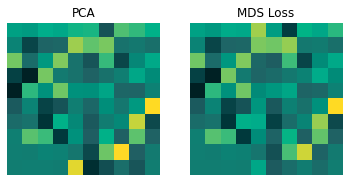

In [7]:
cmap = paradime.utils.plotting.get_colormap()
fig, (ax1, ax3) = plt.subplots(1, 2)
ax1.imshow(pca.components_, cmap=cmap)
ax1.set_axis_off()
ax1.set_title("PCA")
# ax2.imshow(pd_pca.model.weight.detach().numpy(), cmap=cmap)
# ax2.set_axis_off()
# ax2.set_title("Position Loss")
ax3.imshow(pd_mds.model.weight.detach().numpy(), cmap=cmap)
ax3.set_axis_off()
ax3.set_title("MDS Loss")

<AxesSubplot:>

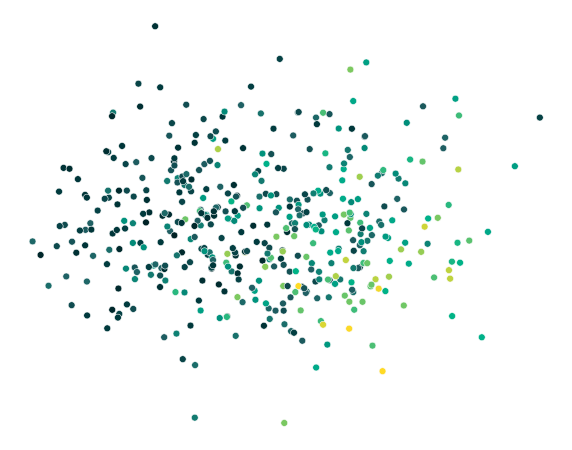

In [13]:
paradime.utils.plotting.scatterplot(pd_mds.apply(data)[:,:2],c=diabetes['target'],cmap=cmap)

<AxesSubplot:>

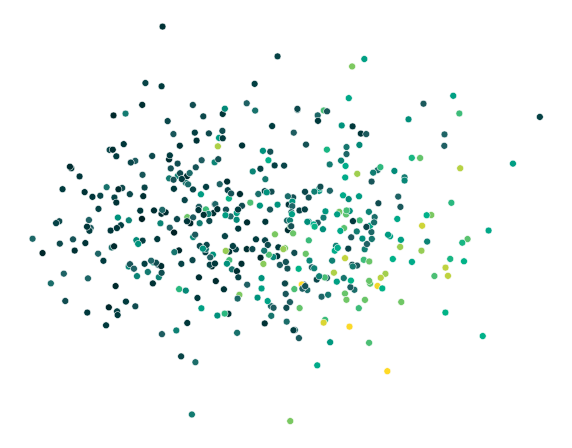

In [14]:
paradime.utils.plotting.scatterplot(pca.transform(data)[:,:2],c=diabetes['target'],cmap=cmap)